In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
airline = pd.read_csv('airline_passengers.csv', index_col = "Month")

In [6]:
#drop missing values
airline.dropna(inplace=True)

In [7]:
#make it into a datetimeindex
airline.index = pd.to_datetime(airline.index)

In [9]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [10]:
#6 month simple moving average
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [13]:
#12 month simple moving average
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

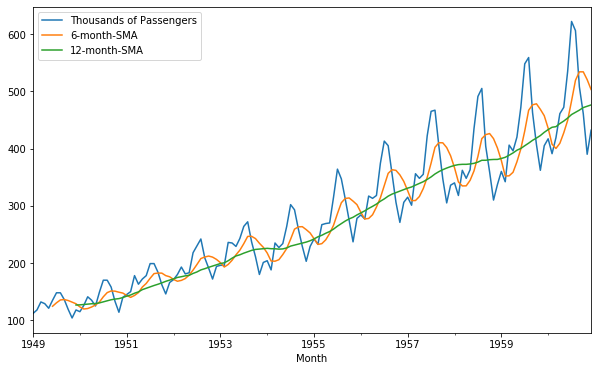

In [15]:
airline.plot(figsize=(10,6))

In [16]:
#EWMA improves on SMA, lets recent points have more weight than past points.
#as more data has been gathered the further you go
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

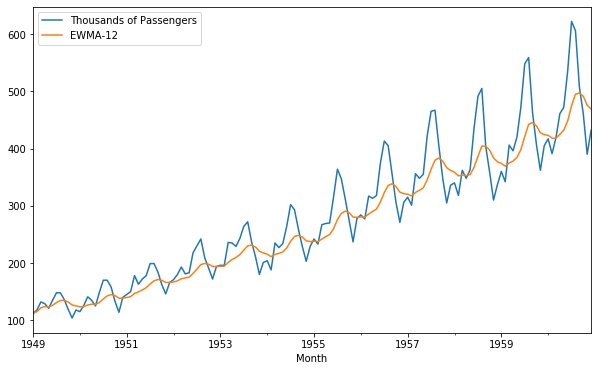

In [17]:
#behavior changes as it moves forward as points are weighted. 
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(10,6))

# EWMA
## Exponentially-weighted moving average
We just showed how to calculate the SMA based on some window.However, basic SMA has some "weaknesses".

Smaller windows will lead to more noise, rather than signal
It will always lag by the size of the window
It will never reach to full peak or valley of the data due to the averaging.
Does not really inform you about possible future behaviour, all it really does is describe trends in your data.
Extreme historical values can skew your SMA significantly
To help fix some of these issues, we can use an EWMA (Exponentially-weighted moving average).

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size. Full details on Mathematics behind this can be found here Here is the shorter version of the explanation behind EWMA.

The formula for EWMA is:

𝑦𝑡=∑𝑖=0𝑡𝑤𝑖𝑥𝑡−𝑖∑𝑖=0𝑡𝑤𝑖
Where x_t is the input value, w_i is the applied weight (Note how it can change from i=0 to t), and y_t is the output.

Now the question is, how to we define the weight term w_i ?

This depends on the adjust parameter you provide to the .ewm() method.

When adjust is True (default), weighted averages are calculated using weights:

𝑦𝑡=𝑥𝑡+(1−𝛼)𝑥𝑡−1+(1−𝛼)2𝑥𝑡−2+...+(1−𝛼)𝑡𝑥01+(1−𝛼)+(1−𝛼)2+...+(1−𝛼)𝑡
When adjust=False is specified, moving averages are calculated as:

𝑦0𝑦𝑡=𝑥0=(1−𝛼)𝑦𝑡−1+𝛼𝑥𝑡,
which is equivalent to using weights:

𝑤𝑖={𝛼(1−𝛼)𝑖(1−𝛼)𝑖if 𝑖<𝑡if 𝑖=𝑡.
When adjust=True we have y0=x0 and from the last representation above we have yt=αxt+(1−α)yt−1, therefore there is an assumption that x0 is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

One must have 0<α≤1, and while since version 0.18.0 it has been possible to pass α directly, it’s often easier to think about either the span, center of mass (com) or half-life of an EW moment:

𝛼=2𝑠+1,11+𝑐,1−explog0.5ℎ,for span 𝑠≥1for center of mass 𝑐≥0for half-life ℎ>0
Span corresponds to what is commonly called an “N-day EW moving average”.
Center of mass has a more physical interpretation and can be thought of in terms of span: c=(s−1)/2
Half-life is the period of time for the exponential weight to reduce to one half.
Alpha specifies the smoothing factor directly.